# KDE approach  (DR3)

<h5 style="text-align:right; margin-right:15px"> 2024-01-24 06:06</h5>

Not applying ML, so no fit to targets to generate prediction model. Instead we compute KDE probability density distributions
for the ML targets, which we then apply to the unid and bcu associations.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6d749e3760>

### Data selection cut: "0.15<Ep<4 & d>0.2 & variability<25"

subset,blazar,psr,msp,unid,bcu
counts,,,,,
all,2127,143,147,2179,1554
selected,168,135,144,1366,354
%,8,94,98,63,23


## Create KDE functions  in lieu of ML training
* Features: ['d', 'log_epeak', 'diffuse'] 
* Targets: dict_keys(['psr', 'msp', 'blazar'])

### Blazar KDE for blazar and pulsar types
The KDE for blazars is determined from the `bll` and `fsrq` classes. Here we 
examine distributions
of it for the blazar types, including also `bcu`, and the pulsar types.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6d7451e3e0>
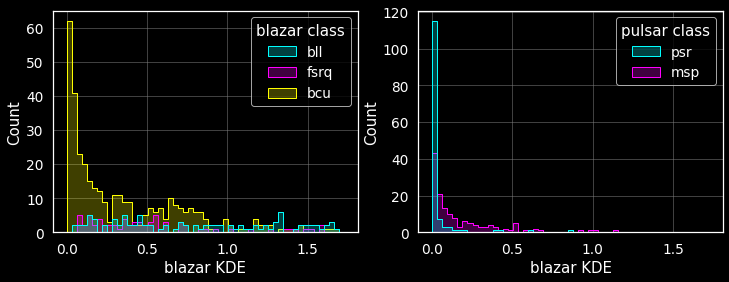

Note that the `bcu` has a component that does not correspond to that
expected for the known blazar types. The pulsars show show small 
values of the blazar KDE, but there is a little mixing for `msp`. 

### Spectral shape plots

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6d744289d0>
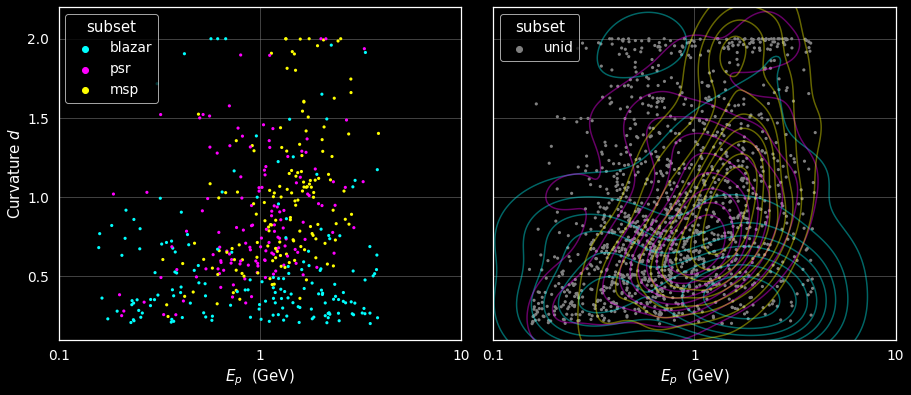

### Flux plots

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6d74104250>
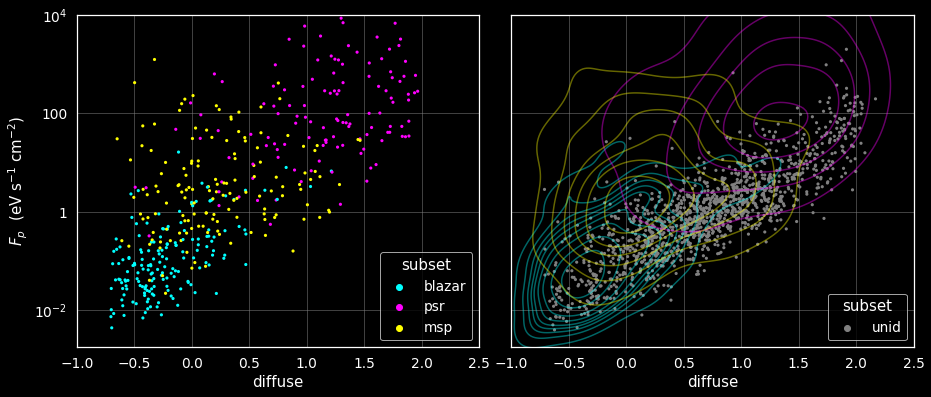

In [1]:
%run pylib/ml_fit dr3  show dark kde

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6d740e8cd0>
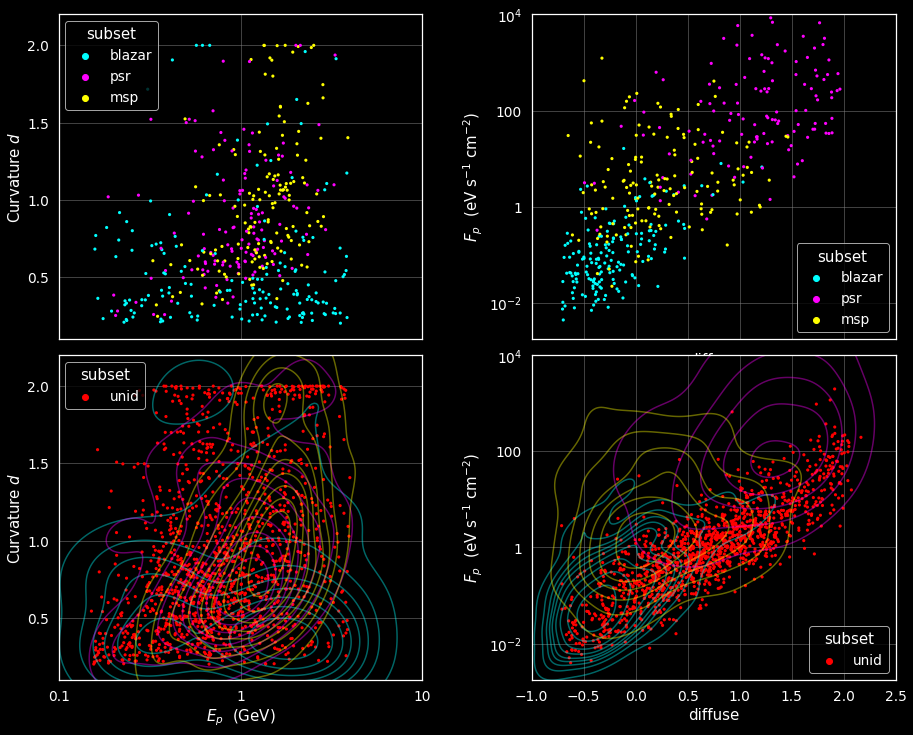

In [2]:
show_fig(plot_kde_density,self,dfc, palette=['red'] )

Selected:<br>          0
subset    
bcu      3
blazar   1
msp      2
psr      4
unid    34

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc641bb1f60>
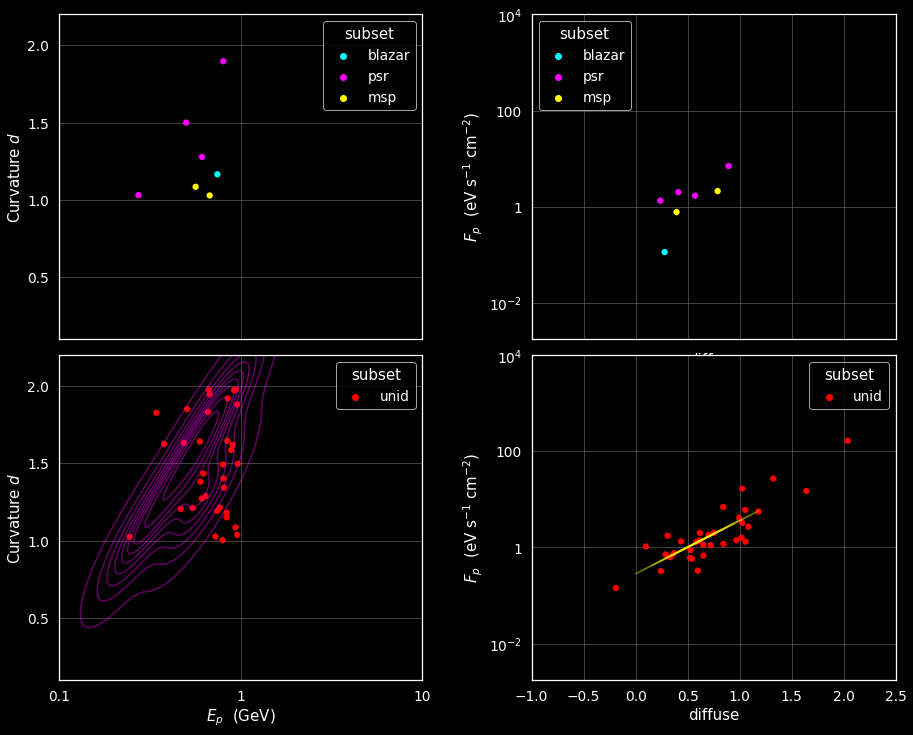

In [5]:
data = dfc.query('10>significance>5 & r95<8/60 & d>1 & Ep<1')
show(f'Selected:<br> {pd.DataFrame(data.groupby("subset").size())}')
show_fig(plot_kde_density,self,data, palette=['red'], s=40 )

In [6]:
from pylib.skymaps import AITfigure, ZEAfigure
from pylib.diffuse import Diffuse
dmap = Diffuse().diffuse_hpm.map   

* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_v07_hpx.fits`
  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$
 select energy= 1000 MeV


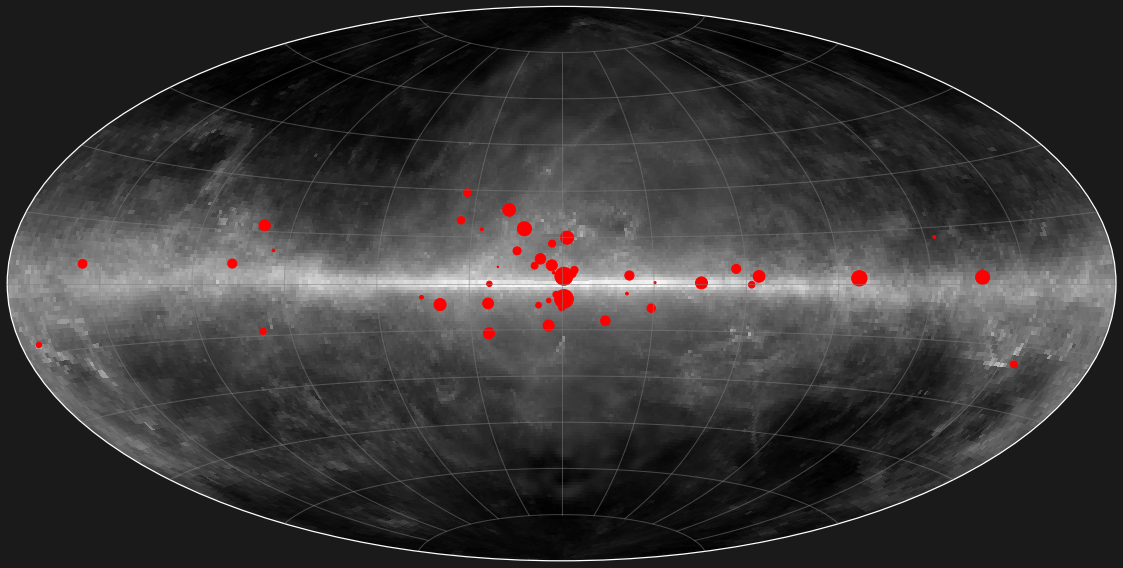

In [7]:
from pylib.tools import  update_legend, set_theme
set_theme('dark')    
dfx = dfc.query('10>significance>5 & r95<8/60 & d>1 & Ep<1')
(AITfigure(figsize=(20,10))
     .imshow(dmap, cmap='gist_gray')
    .scatter(dfx, s=500*dfx.psr_kde, c='red')
)

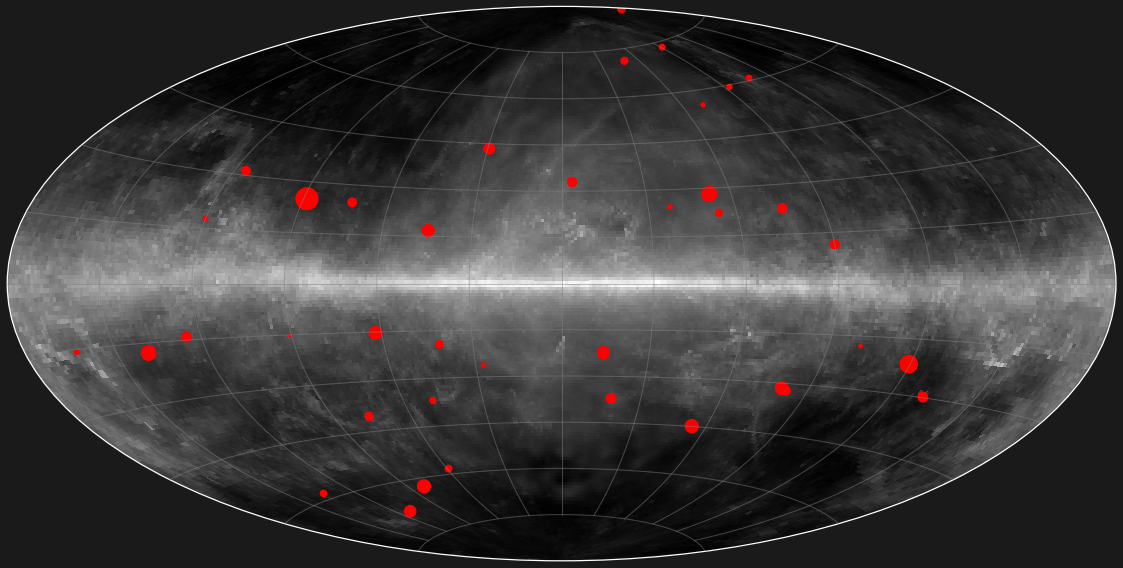

In [8]:
dfy= dfc.query('blazar_kde>0.3')
(AITfigure(figsize=(20,10))
     .imshow(dmap, cmap='gist_gray')
    .scatter(dfy, s=100*dfy.log_fpeak, c='red')
);


In [9]:
self.df.groupby('subset').size()

subset
bcu       1554
blazar    2127
msp        147
psr        143
unid      2179
dtype: int64

## Low-curvature (<0.2) Unid's

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc641aeeb00>
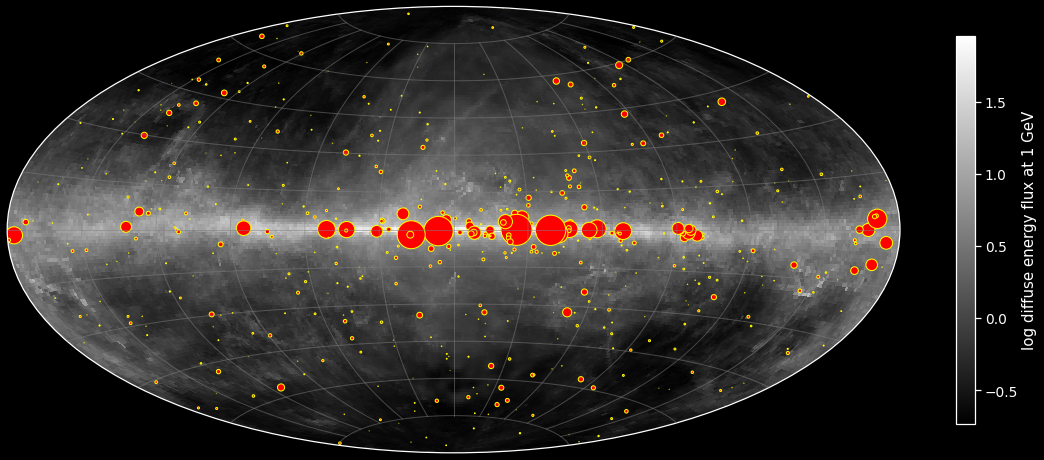

In [10]:
%run pylib/skymaps
data=self.df.query('subset=="unid" & d<0.2')# & Ep>2')
show("""## Low-curvature (<0.2) Unid's""")
afig = (AITfigure(figsize=(20,10))
    .imshow(dmap, cmap='gist_gray')
    .colorbar(shrink=0.7, label='log diffuse energy flux at 1 GeV')
    .scatter(data, s=10*data.Fp, #100*data.log_fpeak, 
             edgecolor='yellow', c='red',)
    .apply(lambda x: show(x.figure, 
                    caption=f"""AIT plot of the locations of the {len(data)} Unid sources with curvature<0.2. The symbol size 
                    is proportional to the peak energy flux. It is plotted on a background of the Galactic diffuse energy flux 
                    at 1 GeV.
                    """))
);

In [12]:
data.sort_values('Fp', ascending=False)

,glat,glon,significance,r95,variability,class1,lp_spec,Ep,Fp,d,association,log_var,log_epeak,log_fpeak,target,subset
4FGL-DR3,,,,,,,,,,,,,,,,
4FGL J1626.0-4917,-0.086029,334.625244,7.565773,0.0787,12.666679,,"LogParabola(1.46e-13, 2.56, 0.04, 3448)",0.100000,96.328964,0.087194,unid,1.102663,-1.000000,1.983757,NaN,unid
4FGL J1514.1-5805,-0.282994,320.892242,5.580019,0.0823,4.038234,,"LogParabola(8.47e-14, 2.57, -0.00, 3330)",0.100000,91.668521,-0.003587,unid,0.606191,-1.000000,1.962220,NaN,unid
4FGL J1801.8-2358,-0.610649,6.106798,12.342216,0.0488,6.892213,,"LogParabola(8.42e-14, 2.30, 0.01, 5547)",0.100000,86.538416,0.027436,unid,0.838359,-1.000000,1.937209,NaN,unid
4FGL J1829.4-1500,-2.057670,17.101192,4.499959,0.0774,17.722412,,"LogParabola(2.90e-14, 2.36, -0.11, 3794)",0.100000,78.101860,-0.100000,unid,1.248523,-1.000000,1.892661,NaN,unid
4FGL J0616.5+2235,2.905253,188.962494,13.885167,0.0202,14.223894,,"LogParabola(3.07e-14, 2.02, 0.05, 12530)",10.196631,37.476682,0.108650,unid,1.153019,1.008457,1.573761,NaN,unid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4FGL J1243.5+5311,63.888748,125.631737,5.296345,0.0544,13.452051,,"LogParabola(8.58e-15, 1.95, 0.07, 3278)",4.860385,0.004231,0.132719,unid,1.128789,0.686671,-2.373604,NaN,unid
4FGL J0944.6+5729,45.449520,156.803299,5.105071,0.0536,6.972636,,"LogParabola(2.73e-15, 1.88, 0.03, 5509)",31.649288,0.004102,0.067948,unid,0.843397,1.500364,-2.387022,NaN,unid
4FGL J1210.1+3241,79.474419,178.571426,4.582070,0.0696,9.636650,,"LogParabola(5.65e-15, 1.92, 0.04, 3963)",9.789555,0.004087,0.084211,unid,0.983926,0.990763,-2.388632,NaN,unid


In [ ]:
sns.pairplot(dfc, hue='subset', hue_order='unid psr msp'.split(), vars = 'd log_epeak diffuse'.split(), 
             palette=self.palette ,  kind='kde',      height=3, corner=True);

In [ ]:
kde_vars = 'd log_epeak log_fpeak diffuse'.split()
show(f"""## Create KDE functions 
Using variables {kde_vars}""")

In [ ]:
fig, axx = plt.subplots(ncols=3, figsize=(15,5), sharex=True, sharey=True)
kw=dict( element='step', bins=np.arange(0,1,0.025), hue='group', log_scale=(False,False), legend=False)
dfu = dfc[dfc.group=='unid']
for name, ax in zip('psr msp blazar'.split(), axx.flat):#    if name=='unid': continue
    sns.histplot(dfu, ax=ax, x=name+'_kde', **kw);
    sns.histplot(dfu.query('blazar_kde<0.01'), ax=ax, x=name+'_kde', facecolor='maroon',**kw);

In [ ]:
show(f"""## Construct likelihood of msp, psr, blazar
""")
class Likelihood:
    def __init__(self, df,  vars, cols ='msp_kde psr_kde blazar_kde unid_kde'.split() ):
        # generate KDE functions and calculate for the Unids
        df = apply_kde(self, df, vars)
        self.kde_vals = df.loc[df.group=='unid', cols]

    def __call__(self, x):
        a = np.atleast_1d(x)
        b = 1-sum(a)
        K = self.kde_vals
        KA,KU = K.iloc[:,:-1], K.iloc[:,-1]
        t = (a*KA).sum(axis=1)
        u = b*KU
        return np.sum(np.log(t+u))
     

ll = Likelihood(dfc, vars='d log_epeak log_fpeak diffuse'.split())
xx = np.arange(1,2,0.05)
yy = [ll([2,x,1]) for x in xx ]

plt.plot(xx,yy, '.');

In [ ]:
show(f'Sums:')
pd.Series(t.sum(axis=0), name="Sums")

In [ ]:
show("---")
from sklearn.neighbors import KernelDensity
KernelDensity

In [ ]:
sns.scatterplot(dfu.query('blazar_kde<0.01'), x='psr_kde',y='msp_kde', s=10);

In [ ]:
show(sns.scatterplot(dfc, x='msp_kde', y='blazar_kde', s=10).figure)

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
kw =dict(x='log_epeak', y='d', s=10, hue='group', edgecolor='none' )
sns.kdeplot(dfc, ax=ax, hue_order=self.target_names,  **kw, alpha=0.6,
                   palette=self.palette, );
t = sns.scatterplot(dfc,ax=ax, hue_order=['unid'], **kw, palette=['yellow']);
ax.set(**epeak_kw(), yticks=np.arange(0.5,2.1,0.5), ylabel='Curvature ${d}$');

In [ ]:
apply_kde(self, dfc, 'd log_epeak log_fpeak diffuse'.split())
sns.scatterplot(dfc, x='pulsar_kde', y='blazar_kde', s=10);

In [ ]:
from seaborn.relational import _ScatterPlotter

In [ ]:
%run pylib/kde
gde = Gaussian_kde(dfc,  cols=self.features)
gde

In [ ]:
gde

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(10,8), sharex=True, sharey=True,
                             gridspec_kw=dict(wspace=0.08))
kw =dict(x='log_epeak', y='d', s=25,  edgecolor='none' )
cmap = 'jet'
sns.scatterplot(dfc[dfc.group=='unid'], ax=ax, **kw, hue='kde_asymmetry',# hue_norm=np.arange(-1,1,0.2),
                palette='RdBu',              #  hue_norm= plt.Normalize(-1,1),
           );
ax.set(**epeak_kw(), yticks=np.arange(0.5,2.1,0.5));
show(fig)

In [ ]:
show(dfc.groupby('target').size())
show(f'Unids in selection: {len(dfcu)}')
df4 = apply_kde(self, df=dfc)
df3 = apply_kde(self, df=dfc, features='d log_epeak log_var'.split()) 

In [ ]:
def kde_scatter_plots(self, df=None):
    """KDE scatter plots.
    """
    if df is None: df = self.df
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
    kw = dict( s=10,  x='pulsar_kde', y='blazar_kde', palette=self.palette, edgecolor='none')
    sns.scatterplot(df, ax=ax1, hue='target', **kw);
    sns.scatterplot(df, ax=ax2, hue='association', hue_order='bcu unid'.split(), **kw);
    return fig
show_fig(kde_scatter_plots, self, df=df4)
show_fig(kde_scatter_plots, self, df=df3)

In [ ]:
def plot_asymmetry(self, df=None): 
    """Asymmetry histograms.
    """
    if df is None: df = self.df
    kw = dict( x='kde_asymmetry', bins=np.arange(-1,1.01, 0.05),
              palette=self.palette,log_scale=(False, True),element='step')
    fig, axx = plt.subplots(nrows=3, figsize=(8,8), sharex=True,
                           gridspec_kw=dict(hspace=0.05))
    sns.histplot(df, ax=axx[0], hue='target', **kw);
    for ax, assoc in zip(axx[1:], 'bcu unid'.split()):
        sns.histplot(df, ax=ax, hue='association', hue_order=[assoc], **kw)
    axx[-1].set(xticks=np.arange(-1,1.01, 0.5))
    return fig
show_fig(plot_asymmetry,self, df4)

In [ ]:
def ecdf_plots(self, df=None, ax=None, **kwargs):
    """ECDF plots.
    """
    if df is None: df=self.df
    fig, ax = plt.subplots(figsize=(8,4)) if ax is None else (ax.figure, ax)
    
    kw = dict(data=df, ax=ax,  x='kde_asymmetry', palette=self.palette)#, legend=False)
    kw.update(kwargs)
    sns.ecdfplot(hue='association',hue_order='msp psr unid fsrq bll'.split(),**kw)
    ax.set(ylim=(0,1.05),xticks=np.arange(-1,1.01, 0.5), yticks=np.arange(0,1.01,0.2) )
    return fig

show("""### ECDF with and without flux""")
fig, ax = plt.subplots(figsize=(8,6))
ecdf_plots( self, df=df4, ax=ax, )
# ecdf_plots( self, df=df3, ax=ax, ls='--')
show(fig)

In [ ]:
show(pd.Series(df3.groupby('target').size(), name='count'))

fig, ax = plt.subplots(figsize=(8,4))
kw = dict(hue='target',  x='kde_asymmetry', lw=1, 
          # element='step', bins=np.linspace(0,1,26), log_scale=(False,True),
         palette = self.palette)
# sns.ecdfplot(df4, ax=ax,**kw)
sns.ecdfplot(df3, ax=ax, **kw, ls='--', legend=False, )


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip", hue="size",
                     palette='RdBu', data=tips)

# norm = plt.Normalize(tips['size'].min(), tips['size'].max())
# sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
# sm.set_array([])

# # Remove the legend and add a colorbar
# ax.get_legend().remove()
# ax.figure.colorbar(sm)

plt.show()